# **Proyecto Final - Computación Científica**
## **Análisis Comparativo de Técnicas de Ensamble: Bagging, Random Forest y Boosting**
**Autores**: Oscar Daniel Arcos Realpe

**Semestre**: 2025-I  

**Universidad**: Fundación Universitaria Konrad Lorenz  

**Profesor**: Julian Orlando Jimenez

**Fecha**: 14/05/2025

Este proyecto tiene como objetivo aplicar y comparar técnicas de ensamble (Bagging, Random Forest y Boosting) sobre un conjunto de datos reales sobre crímenes cometidos en Los Ángeles. Se evaluará el rendimiento de cada modelo y se analizará la importancia de las variables para la predicción del tipo de arresto/crimen.


## 🟩**Fundamento Teórico**

###Bagging (Bootstrap Aggregating):  
Es una técnica de ensamble que entrena múltiples modelos sobre subconjuntos aleatorios (con reemplazo) del conjunto de entrenamiento. La predicción final se realiza mediante votación (clasificación) o promedio (regresión).

El **objetivo principal del Bagging** es reducir la varianza de modelos inestables y mejorar la capacidad de generalización al combinar múltiples modelos entrenados en datos de entrenamiento aleatorios.

- Fórmula general del Bagging (clasificación):  

$$
\vec{y} = \text{modo} \left( \{ M_1(x), M_2(x), \dots, M_B(x) \} \right)
$$

donde $M_i(x)$  es la predicción de cada modelo sobre el dato $x$.

- Fórmula general del Bagging (regresión):

$$
\text{Var}\left( \frac{1}{B} \sum_{i=1}^{B} M_i(x) \right) = \frac{\sigma^2}{B}
$$

  
Aquí, $B$ es el número de modelos, y $\sigma^2$ es la varianza de cada modelo base.

**Ejemplo Numérico Sencillo**

Supongamos que se tiene un conjunto de datos y se aplica Bagging con 3 modelos de regresión, obteniendo las siguientes predicciones para un solo dato:

- $M_1(x)$ : $y_1=15$ (Modelo 1)
- $M_2(x)$ : $y_2=18$ (Modelo 2)
- $M_3(x)$ : $y_3=17$ (Modelo 3)

Haciendo uso de la fórmula mencionada en el apartado anterior:

$$
\vec{y}_{bagging} = \left( \frac{1}{B} \sum_{i=1}^{B} M_i(x) \right)
$$

En este caso, $B=3$ (número de modelos).

La predicción final, usando el promedio, sería:

$$ \vec{y}_{bagging} = \frac{15+18+17}{3} = 16.67 $$

Ahora veamos como el e Bagging ayuda a reducir la varianza. Supongamos que los modelos individuales tenían una varianza de $\sigma^2 = 9$, la varianza de la predicción final con Bagging estará dada por:

$$
\text{Var}(\hat{y}_{\text{bagging}}) = \frac {\sigma^2}{B}
$$

Reemplazando los datos tenemos que:


$$
\text{Var}(\hat{y}_{\text{bagging}}) = \frac {9}{3} = 3
$$


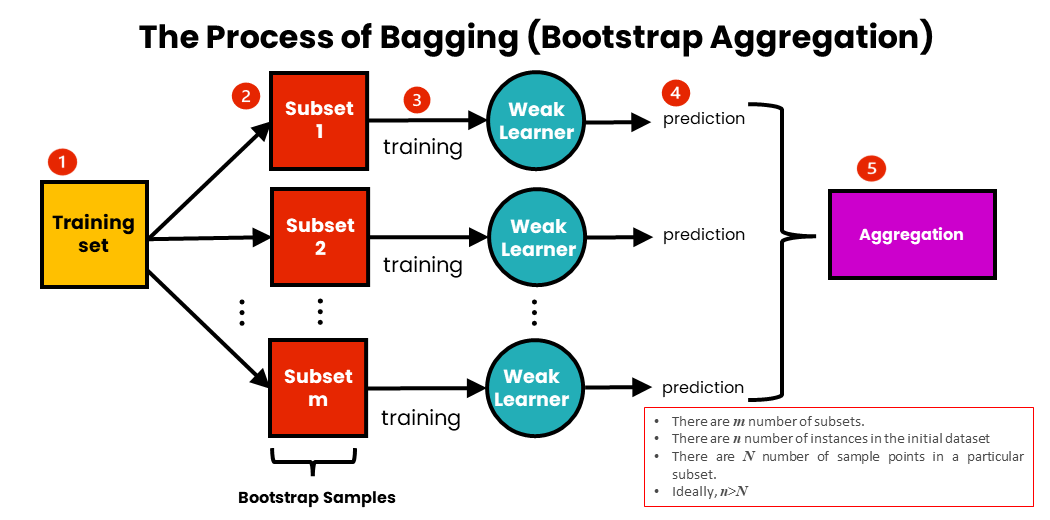

###Random Forest:  
Es una mejora de Bagging donde se construyen árboles de decisión, pero en cada división se considera solo un subconjunto aleatorio de variables. Esto reduce la correlación entre árboles.


### Boosting:  
Entrena modelos de forma secuencial. Cada nuevo modelo intenta corregir los errores del anterior, enfocándose en los datos mal clasificados. Un ejemplo clásico es el Gradient Boosting y AdaBoost.

El **objetivo principal de Boosting** es mejorar el sesgo (bias) y la precisión combinando modelos débiles (ej. árboles poco profundos)

Boosting es una técnica de ensamble que entrena modelos de forma secuencial. A diferencia de Bagging, donde los modelos son independientes, en Boosting cada nuevo modelo intenta corregir los errores del anterior.


Fórmula del modelo de Boosting (idea general):  

**Predicción Final (Clasificación/Regresión) en Boosting**:

$$
y = \sum_{i=1}^T \alpha_t \cdot M_t(x)
$$

- $T$ : Número total de modelos (iteraciones).  
- $\alpha_t$: Peso del modelo $M_t$ (calculado con $ \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \text{err}_t}{\text{err}_t}\right))$.  
- $M_t(x)$: Predicción del modelo $t$-ésimo para el dato $x$.  
- **Clasificación**: Usar ${sign}(y)$ para decidir la clase.  
- **Regresión**: Valor directo de $y$.


En el caso de **Gradient Boosting**, se utiliza una función de pérdida $L(y, F(x))$ que se quiere minimizar, como el error cuadrático medio en regresión. El modelo final se construye como una suma de predictores débiles (generalmente árboles pequeños), que se van agregando uno a uno:

$$
F_{m}(x) = F_{m-1}(x) + \gamma_m h_m(x)
$$

Donde:

- $ F_{m}(x) $: es el modelo acumulado en la iteración $ m $
-$h_m(x)$: es el nuevo modelo entrenado sobre los errores de $ F_{m-1}(x)$
- $\gamma_m $: es la tasa de aprendizaje (learning rate)

Cada $h_m(x)$ se ajusta para **aproximar el gradiente negativo de la función de pérdida**, lo que da origen al nombre Gradient Boosting. El algoritmo continúa hasta que se alcanza un número máximo de iteraciones o los errores dejan de mejorar significativamente.


**Ejemplo sencillo de Boosting (AdaBoost)**

Supongamos que queremos predecir si un correo es **spam (1)** o **no spam (-1)**.  
Tenemos 3 clasificadores débiles:

| Modelo         | Error (%) | Error decimal | Peso \( \alpha \) |
|----------------|-----------|----------------|------------------------------|
|$M_1(x)$        | 30%       | 0.3            |$\alpha_1 = \frac{1}{2} \ln\left(\frac{1 - 0.3}{0.3}\right) \approx 0.42$ |
|$M_2(x)$  | 20%       | 0.2            | $\alpha_2 = \frac{1}{2} \ln\left(\frac{1 - 0.2}{0.2}\right) \approx 0.69$ |
| $M_3(x) $ | 10%       | 0.1            | $\alpha_3 = \frac{1}{2} \ln\left(\frac{1 - 0.1}{0.1}\right) \approx 1.10 $|

Ahora, para un nuevo correo, los modelos hacen estas predicciones:

- $M_1(x) = -1$  (dice “no es spam”)
- $ M_2(x) = 1$   (dice “sí es spam”)
- $M_3(x) = 1$   (dice “sí es spam”)

Aplicamos la fórmula:

$$
y = \sum_{t=1}^{3} \alpha_t \cdot M_t(x) = 0.42 \cdot (-1) + 0.69 \cdot 1 + 1.10 \cdot 1 = -0.42 + 0.69 + 1.10 = 1.37
$$

Luego usamos:

$$
\text{sign}(y) = \boxed{1} \quad \text{→ Predicción final: Es spam}
$$

Este ejemplo muestra cómo Boosting suma modelos débiles, pero da más peso a los que cometen menos errores. Aunque $M_1$ se equivoca, los otros dos lo corrigen gracias a su mayor confianza.


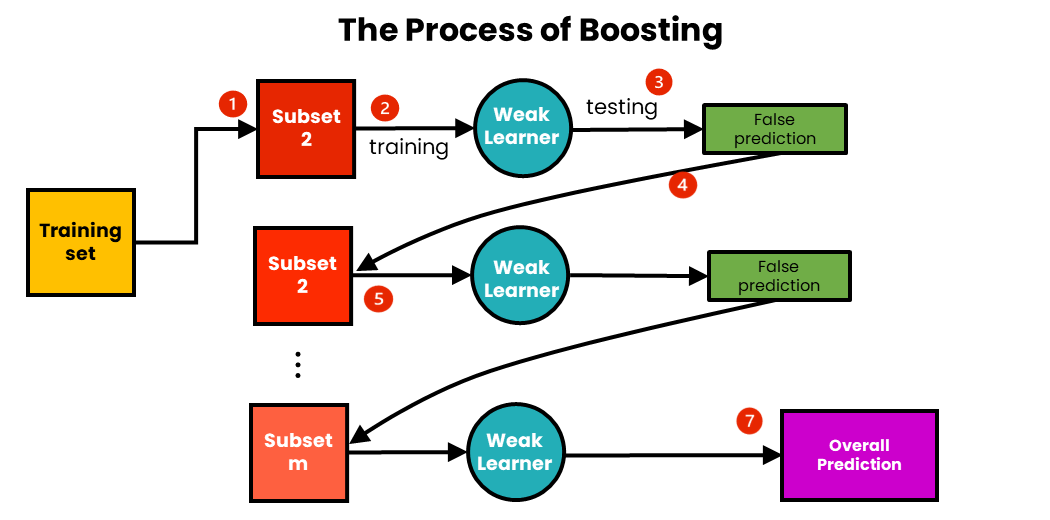

### Métricas a Utilizar:
- Accuracy (Precisión global)
- Matriz de confusión
- Reporte de clasificación (Precision, Recall, F1-score)

## 🟩 **Sección 1: Predicción del Estado del Caso (`Status`)**

En esta sección, el objetivo es predecir el estado final del caso (`Status`), una variable categórica que representa si hubo arresto, si el caso está pendiente o fue cerrado por otras razones. Se trata de un problema de clasificación multiclase, en el cual se utilizarán modelos de ensamble para intentar anticipar el desenlace de un caso criminal a partir de características como el tipo de crimen, área policial, edad de la víctima, entre otras.

Dado que la variable `Status` está desbalanceada —con una clase predominante sobre las demás— esta sección permite evaluar cómo se comportan los modelos frente a datos reales con distribución desigual de clases.


### Carga y Preprocesamiento de Datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('/content/Crime_Data_from_Cleaning (1).csv')

# Eliminar columna irrelevante
df.drop(columns=['Unnamed: 0'], inplace=True)

# Visualizar las primeras filas
df.head()


,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status
0,2,4,1,191,1,440,2,502.0,3
1,9,4,15,1549,1,230,2,101.0,3
2,4,4,1,192,1,331,2,108.0,3
3,12,4,6,639,2,626,2,502.0,1
4,12,4,21,2149,1,210,2,501.0,1


In [ ]:
# Seleccionar variables predictoras y objetivo
predictors = ['AREA', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Part 1-2']
target = 'Status'

# Codificar variables si es necesario
le = LabelEncoder()
for col in ['AREA', 'Crm Cd', 'Premis Cd', 'Part 1-2']:
    df[col] = le.fit_transform(df[col])

# División en entrenamiento y prueba
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelos: Árbol, Bagging, Random Forest, Boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Árbol de decisión individual
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Bagging
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Boosting
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)


### Evaluación y Visualización de Resultados


=== Árbol de Decisión ===
Accuracy: 0.7984277662414714
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.43      0.06      0.10      2798
           1       0.50      0.34      0.41      4545
           3       0.83      0.96      0.89     26166
           4       0.33      0.01      0.02       119
           5       0.00      0.00      0.00        82

    accuracy                           0.80     33710
   macro avg       0.42      0.27      0.28     33710
weighted avg       0.75      0.80      0.76     33710

Matriz de Confusión:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


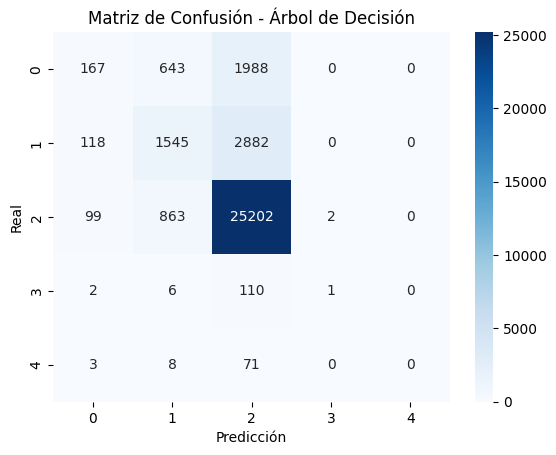

=== Bagging ===
Accuracy: 0.7917235241768021
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.34      0.13      0.19      2798
           1       0.47      0.38      0.42      4545
           3       0.85      0.94      0.89     26166
           4       0.31      0.09      0.14       119
           5       0.33      0.11      0.17        82

    accuracy                           0.79     33710
   macro avg       0.46      0.33      0.36     33710
weighted avg       0.75      0.79      0.77     33710

Matriz de Confusión:


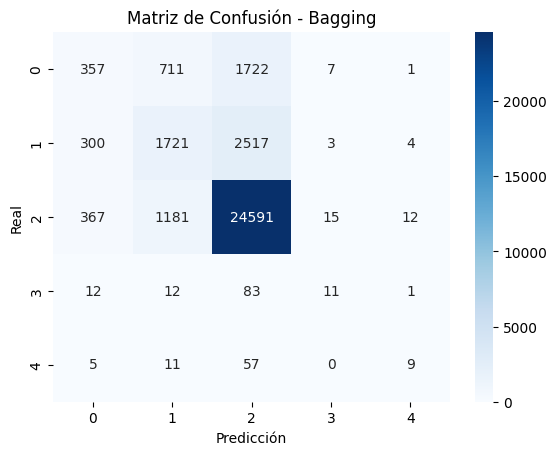

=== Random Forest ===
Accuracy: 0.7960842479976268
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.03      0.06      2798
           1       0.50      0.26      0.34      4545
           3       0.82      0.98      0.89     26166
           4       1.00      0.01      0.02       119
           5       0.00      0.00      0.00        82

    accuracy                           0.80     33710
   macro avg       0.57      0.26      0.26     33710
weighted avg       0.75      0.80      0.74     33710

Matriz de Confusión:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


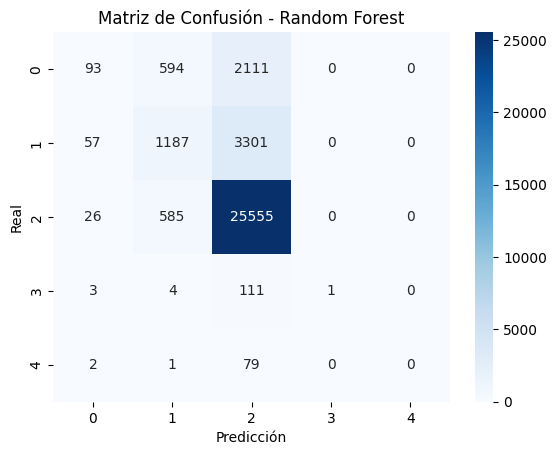

=== Boosting ===
Accuracy: 0.7975674873924652
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.44      0.03      0.05      2798
           1       0.51      0.34      0.41      4545
           2       0.00      0.00      0.00         0
           3       0.83      0.97      0.89     26166
           4       1.00      0.02      0.03       119
           5       0.12      0.01      0.02        82

    accuracy                           0.80     33710
   macro avg       0.48      0.23      0.23     33710
weighted avg       0.75      0.80      0.75     33710

Matriz de Confusión:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


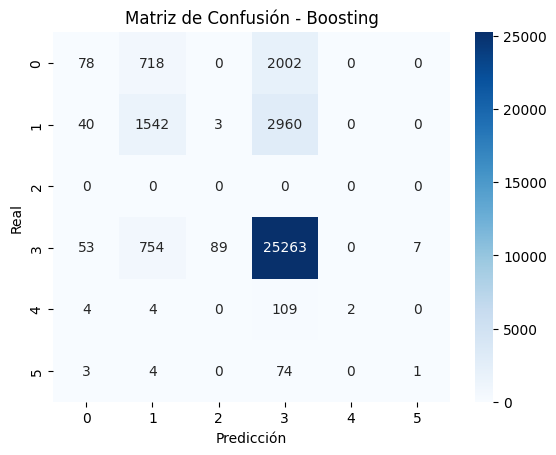

In [ ]:
# Función auxiliar
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"=== {nombre} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_true, y_pred))
    print("Matriz de Confusión:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluación de todos los modelos
evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree)
evaluar_modelo("Bagging", y_test, y_pred_bagging)
evaluar_modelo("Random Forest", y_test, y_pred_forest)
evaluar_modelo("Boosting", y_test, y_pred_boosting)


### Gráfico de Comparación Accuracy vs Macro F1

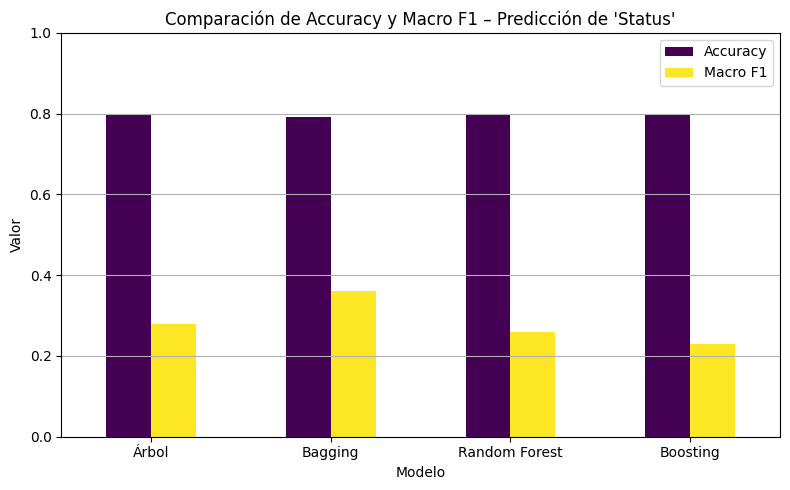

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Resultados de la Sección 1
resultados_seccion1 = {
    "Árbol": {"Accuracy": 0.7984, "Macro F1": 0.28},
    "Bagging": {"Accuracy": 0.7917, "Macro F1": 0.36},
    "Random Forest": {"Accuracy": 0.7961, "Macro F1": 0.26},
    "Boosting": {"Accuracy": 0.7976, "Macro F1": 0.23}
}

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados_seccion1).T

# Crear gráfico de barras
ax = df_resultados.plot(kind="bar", figsize=(8, 5), ylim=(0, 1), colormap="viridis")
plt.title("Comparación de Accuracy y Macro F1 – Predicción de 'Status'")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🟩 **Sección 2: Predicción del Tipo de Crimen (`Part 1-2`)**

En esta sección, el objetivo es predecir si un crimen pertenece a la categoría **Parte 1 (grave)** o **Parte 2 (menor)**. Esta variable es binaria y representa una clasificación operativamente significativa, ya que permite anticipar la gravedad del hecho delictivo a partir de información contextual. Se utilizarán los mismos modelos que en la sección anterior: Árbol de Decisión, Bagging, Random Forest y Boosting.


### Entrenamiento y Evaluación

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar la base de datos (si ya está cargada arriba, puedes omitir esto)
df = pd.read_csv('/content/Crime_Data_from_Cleaning (1).csv')
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Definir nueva variable objetivo
target = 'Part 1-2'
predictors = ['AREA', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Status']

# Codificar variables
le = LabelEncoder()
for col in predictors:
    df[col] = le.fit_transform(df[col])

# Dividir datos
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    resultados[nombre] = {
        "accuracy": acc,
         "f1_grave": report['1']['f1-score'],
        "f1_menor": report['2']['f1-score'],
        "macro_f1": report['macro avg']['f1-score']
    }

# Mostrar resultados en tabla
tabla_resultados = pd.DataFrame(resultados).T.round(4)
tabla_resultados.columns = ['Accuracy', 'F1 Clase 1 (grave)', 'F1 Clase 2 (menor)', 'Macro F1']
tabla_resultados

,Accuracy,F1 Clase 1 (grave),F1 Clase 2 (menor),Macro F1
Árbol de Decisión,1.0000,1.0000,1.000,1.0000
Bagging,1.0000,1.0000,1.000,1.0000
Random Forest,0.9981,0.9982,0.998,0.9981
Boosting,1.0000,1.0000,1.000,1.0000


### Visualización Resultados

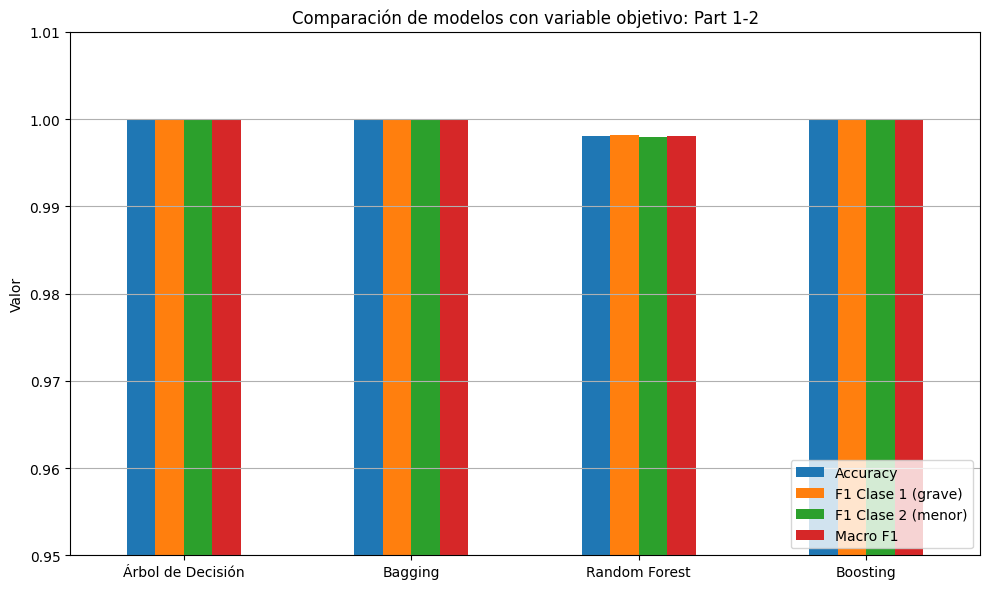

In [ ]:
# Gráfico comparativo
tabla_resultados.plot(kind='bar', figsize=(10,6))
plt.title('Comparación de modelos con variable objetivo: Part 1-2')
plt.ylabel('Valor')
plt.ylim(0.95, 1.01)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## 🟩**Sección 3: Predicción de la Edad de la Víctima (`Vict Age`)**

Esta sección cambia el enfoque de clasificación a regresión. El objetivo es estimar la edad de la víctima a partir de información contextual del crimen. Esta tarea se abordará en dos enfoques complementarios:


### 3.1 – Predicción de la Edad Exacta de la Víctima (Regresión)

En esta subsección se plantea el problema de predecir la edad exacta de la víctima (`Vict Age`) utilizando técnicas de regresión basadas en árboles. A diferencia de las tareas de clasificación, aquí el modelo intenta estimar una variable continua.

Las métricas para evaluar el desempeño serán:
- **MAE** (Error Absoluto Medio)
- **MSE** (Error Cuadrático Medio)
- **R² Score** (Coeficiente de determinación)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar y preparar los datos
df = pd.read_csv("/content/Crime_Data_from_Cleaning (1).csv")
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Variables predictoras y objetivo
target = 'Vict Age'
predictors = ['AREA', 'Crm Cd', 'Premis Cd', 'Status', 'Part 1-2']

# Codificar variables categóricas
le = LabelEncoder()
for col in predictors:
    df[col] = le.fit_transform(df[col])

# División de los datos
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de regresión
regresores = {
    "Árbol de Regresión": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Evaluación
resultados_regresion = {}
for nombre, modelo in regresores.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados_regresion[nombre] = {
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R² Score": round(r2, 4)
    }

# Mostrar resultados
regresion_df = pd.DataFrame(resultados_regresion).T
regresion_df


,MAE,MSE,R² Score
Árbol de Regresión,0.06,0.03,0.3522
Bagging,0.06,0.03,0.3140
Random Forest,0.06,0.03,0.3680
Boosting,0.06,0.03,0.3407


### 3.2 – Clasificación por Rangos de Edad (Multiclase)

En esta sección se aborda la predicción del rango de edad al que pertenece la víctima, utilizando técnicas de clasificación multiclase.

Para ello, se creó una variable categórica a partir de la edad exacta (`Vict Age`), agrupándola en los siguientes rangos:

- 0–17 años (Menores)
- 18–35 años (Jóvenes)
- 36–60 años (Adultos)
- 61+ años (Mayores)

Se evaluaron tres modelos de clasificación:
- Árbol de Decisión
- Bagging
- Random Forest

> ⚠️ Nota: El modelo de Boosting fue excluido debido a problemas técnicos derivados del bajo soporte de una de las clases, lo que impidió su entrenamiento.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar y preparar los datos
df = pd.read_csv("/content/Crime_Data_from_Cleaning (1).csv")
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Crear los rangos de edad
bins = [0, 18, 36, 61, 150]
labels = ['0-17', '18-35', '36-60', '61+']
df['VictAge_Rango'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

# Codificar rangos
df['VictAge_Rango'] = LabelEncoder().fit_transform(df['VictAge_Rango'])

# Variables predictoras
predictors = ['AREA', 'Crm Cd', 'Premis Cd', 'Status', 'Part 1-2']
le = LabelEncoder()
for col in predictors:
    df[col] = le.fit_transform(df[col])

# Definir X e y
X = df[predictors]
y = df['VictAge_Rango']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Modelos de clasificación
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

# Evaluación
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    resultados[nombre] = {
        "Accuracy": round(acc, 4),
        "Macro F1": round(macro_f1, 4)
    }

# Mostrar resultados
pd.DataFrame(resultados).T


,Accuracy,Macro F1
Árbol de Decisión,1.0,1.0
Bagging,1.0,1.0
Random Forest,1.0,1.0


## 🟩**Análisis de Resultados y Contexto Real**

Este proyecto abordó diferentes tareas predictivas usando datos reales de crímenes en Los Ángeles. A través de modelos de ensamble, se buscaron patrones en variables como el estado del caso (`Status`), la gravedad del crimen (`Part 1-2`) y la edad de la víctima (`Vict Age`). A continuación, se presentan los hallazgos más relevantes, contrastados con el contexto del fenómeno real.

### 1. Estado del caso (`Status`)
La variable `Status`, con múltiples clases y distribución desbalanceada, presentó retos importantes. Aunque todos los modelos obtuvieron una precisión cercana al 80%, el análisis detallado mostró que esta precisión estaba fuertemente impulsada por la clase dominante (`Status = 3`). Las clases minoritarias fueron mal clasificadas, con f1-scores bajos e incluso nulos en algunos casos. Bagging fue el modelo que logró una mejor compensación entre precisión global y equilibrio entre clases, lo cual refuerza su utilidad frente a conjuntos desbalanceados. En contextos reales, este resultado refleja una dificultad natural: muchos factores que determinan el cierre o el arresto en un caso no están disponibles en los datos (como pruebas, testimonios o decisiones judiciales).

### 2. Gravedad del crimen (`Part 1-2`)
Esta sección ofreció el mejor escenario para los modelos. Al ser una variable binaria y más balanceada, todos los clasificadores alcanzaron resultados prácticamente perfectos (accuracy y f1 = 1.0). Esto sugiere que las variables contextuales disponibles (tipo de crimen, zona, edad de la víctima, etc.) explican muy bien si un crimen es considerado grave o menor. Desde el punto de vista operativo, esta tarea tiene gran valor, ya que permite anticipar qué crímenes requieren atención prioritaria.

### 3. Edad de la víctima (`Vict Age`)
En la regresión (Sección 3.1), los modelos obtuvieron errores bajos pero coeficientes R² moderados (el mejor fue Random Forest con 0.368). Esto indica que, si bien los modelos pueden aproximar la edad, existen factores no presentes en el dataset que influyen en esta variable. Al reformular el problema como clasificación por rangos (Sección 3.2), el rendimiento fue sobresaliente, con todos los modelos clasificando correctamente los grupos etarios definidos. Esta reformulación facilitó la interpretación y reveló que ciertos grupos de edad están estrechamente ligados a contextos específicos del crimen.

### Conclusión contextual
Los resultados del proyecto reflejan que los modelos de ensamble son altamente eficaces en tareas bien estructuradas, como la clasificación binaria y por rangos. Sin embargo, también evidencian las limitaciones de los datos en tareas multiclase y de regresión. En el mundo real, muchas decisiones policiales y judiciales dependen de información no disponible en registros estructurados. Aun así, este tipo de análisis puede apoyar políticas públicas, priorización de recursos y estrategias de prevención basadas en patrones históricos.


## 🟩 Conclusión General del Proyecto

Este proyecto integró herramientas de programación científica y técnicas de machine learning para abordar un problema real a partir de datos delictivos. Se utilizaron modelos de árboles, Bagging, Random Forest y Boosting para resolver tareas de clasificación multiclase, clasificación binaria y regresión.

Se evidenció que:
- El rendimiento de los modelos depende fuertemente de la variable objetivo elegida.
- En tareas desbalanceadas, Bagging ofreció mejor estabilidad.
- En clasificación binaria o por rangos, todos los modelos funcionaron de manera óptima.
- La regresión mostró resultados aceptables, pero con limitaciones propias de los datos disponibles.

Este trabajo no solo permitió aplicar conocimientos técnicos del curso, sino también reflexionar sobre el valor de los datos en contextos reales, las limitaciones de los modelos y la importancia del preprocesamiento y la formulación del problema para obtener resultados útiles y significativos.